In [1]:
import pandas as pd 

In [2]:
#find df at https://www.kaggle.com/shivamb/real-or-fake-fake-jobposting-prediction
df = pd.read_csv("fake_job_postings.csv")

Define ML problems



    [ ] Choose your target. Which column in your tabular dataset will you predict?
     - I will be predicting the fraudulent column
    [ ] Is your problem regression or classification?
     - Classification
    [ ] How is your target distributed?
        Classification: How many classes? Are the classes imbalanced?
           - 2, it is binary, and heavily imbalanced. The majority class is 95%
    [ ] Choose your evaluation metric(s).
        Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
        - Recall is what I'll be using.

    [ ] Choose which observations you will use to train, validate, and test your model.
        Are some observations outliers? Will you exclude them?
            - I would like to use all of them to TVT.
        Will you do a random split or a time-based split?
            - random
    [ ] Begin to clean and explore your data.
    [ ] Begin to choose which features, if any, to exclude. Would some features "leak" future information?


Day One: Spent tutorialing text parsing so I can get metrics from heavy text data.

I noticed most fraudulents have a lot of NaN's 
 - If row has more than 8 NaN's - assume it is fraudulent is a good guess

In [3]:
df

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [4]:
df['fraudulent'].value_counts(normalize=True)

0    0.951566
1    0.048434
Name: fraudulent, dtype: float64

In [5]:

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
'''
train, test = train_test_split(df, train_size=0.80, test_size=0.20, 
                                stratify= df['fraudulent'], random_state=3)

train, val = train_test_split(train, train_size=0.80, test_size=0.20, 
                                stratify= train['fraudulent'], random_state=3)
'''

"\ntrain, test = train_test_split(df, train_size=0.80, test_size=0.20, \n                                stratify= df['fraudulent'], random_state=3)\n\ntrain, val = train_test_split(train, train_size=0.80, test_size=0.20, \n                                stratify= train['fraudulent'], random_state=3)\n"

In [6]:
    missing_data = []
    for i in range(len(df)) :
        missing_data.append(df.iloc[i].isnull().sum())
    df['missing_data'] = missing_data

In [7]:
#train.shape, val.shape, test.shape

In [8]:
'''

def wrangle(X):
    """Wrangle train, validate, and test sets in the same way"""
    
    # Prevent SettingWithCopyWarning
    X = X.copy()
    

    # return the wrangled dataframe
    return X


train = wrangle(train)
val = wrangle(val)
test = wrangle(test)

'''

'\n\ndef wrangle(X):\n    """Wrangle train, validate, and test sets in the same way"""\n    \n    # Prevent SettingWithCopyWarning\n    X = X.copy()\n    \n\n    # return the wrangled dataframe\n    return X\n\n\ntrain = wrangle(train)\nval = wrangle(val)\ntest = wrangle(test)\n\n'

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt


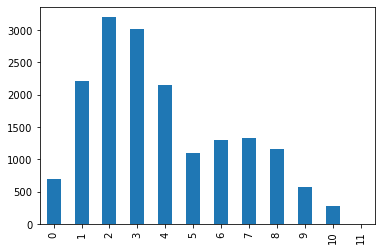

In [10]:
onlyfraud = df[df['fraudulent'] == 1]
notfraud = df[df['fraudulent'] == 0]
fake = pd.Series(notfraud['missing_data'].value_counts().sort_index())

fake.plot.bar();

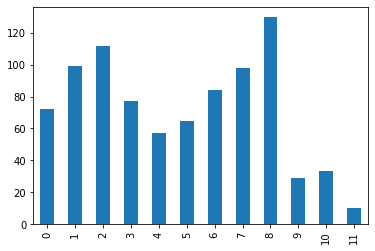

In [11]:
fake2 = pd.Series(onlyfraud['missing_data'].value_counts().sort_index())

fake2.plot.bar();

# 1) Text Pre Processing
# 2) text parsing and Exploratory Data Analysis
# 3) Text Representation & Feature Engineering
# 4) Modeling and or pattern mining

## I will begin with text wrangling
Step 1 : Data Preprocessing

- Tokenization — convert sentences to words
- Removing unnecessary punctuation, tags
- Removing stop words — frequent words such as ”the”, ”is”, etc. that do not have specific semantic
- Stemming — words are reduced to a root by removing inflection through dropping unnecessary characters, usually a suffix.
- Lemmatization — Another approach to remove inflection by determining the part of speech and utilizing detailed database of the language.

Personal anecdote: By normalizing and wrangling all the text, I will inadvertenly be removing many grammar mistakes that are very important to analyzing a possible fraud posting. If time allows, I will compare a standard text wrangling below and a custom grammar allowance one perhaps.

I am going to combine a lot of these string columns together 

In [12]:
#!pip install spacy
#!pip install nltk
#!pip install wordcloud

In [13]:
import re
import string
import random
import plotly.express as px
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin
from sklearn.metrics import accuracy_score, recall_score, plot_confusion_matrix
from wordcloud import WordCloud
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import warnings
warnings.filterwarnings("ignore")

,fraudulent,title
0,0,17014
1,1,866


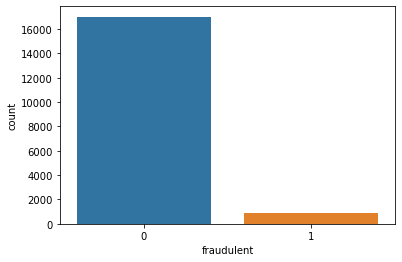

In [14]:
# Heavy Imbalance
sns.countplot(df.fraudulent)
df.groupby('fraudulent').count()['title'].reset_index().sort_values(by='title',ascending=False)



## fill nan values, combine all string columns to be parsed into one big column

In [15]:
df

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,missing_data
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0,4
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,2
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0,8
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,1
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0,2
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0,1
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0,7
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0,3


In [16]:
#Make 'text only' dataframe. drop columns from it i dont want to be parsed
columns = ['title','location','department','company_profile','description','requirements','benefits','required_experience','required_education','industry','function', 'fraudulent']

to_df = df.copy()

to_df = to_df[columns]

In [17]:
#fill na's so functions work. Just a space is fine
to_df.fillna(' ', inplace=True)

In [18]:
to_df

,title,location,department,company_profile,description,requirements,benefits,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,Internship,,,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Not Applicable,,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,,,,,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...
17875,Account Director - Distribution,"CA, ON, Toronto",Sales,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,Mid-Senior level,,Computer Software,Sales,0
17876,Payroll Accountant,"US, PA, Philadelphia",Accounting,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,,,,,,0
17878,Graphic Designer,"NG, LA, Lagos",,,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,Not Applicable,Professional,Graphic Design,Design,0


In [19]:
#Split location column by countries

def split(location):
    listsplit = location.split(',')
    return listsplit[0]

In [20]:
to_df['country'] = to_df.location.apply(split)

to_df

,title,location,department,company_profile,description,requirements,benefits,required_experience,required_education,industry,function,fraudulent,country
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,Internship,,,Marketing,0,US
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Not Applicable,,Marketing and Advertising,Customer Service,0,NZ
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,,,,,0,US
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,US
4,Bill Review Manager,"US, FL, Fort Worth",,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,Account Director - Distribution,"CA, ON, Toronto",Sales,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,Mid-Senior level,,Computer Software,Sales,0,CA
17876,Payroll Accountant,"US, PA, Philadelphia",Accounting,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0,US
17877,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,,,,,,0,US
17878,Graphic Designer,"NG, LA, Lagos",,,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,Not Applicable,Professional,Graphic Design,Design,0,NG


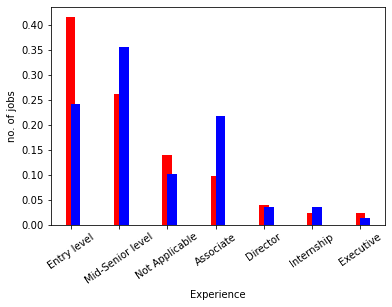

In [21]:
#Graph NORMALIZED comparison between fraud job experience and normal and see the differences

experience = dict(onlyfraud.required_experience.value_counts(normalize=True))
experiencenot = dict(notfraud.required_experience.value_counts(normalize=True))

plt.bar(experience.keys(), experience.values(), color='r', width = 0.2)
plt.bar(experiencenot.keys(), experiencenot.values(), color = 'b', width = 0.2, align='edge')

plt.xlabel('Experience', size=10)
plt.ylabel('no. of jobs', size=10)
plt.xticks(rotation=35)
plt.show()



In [22]:
#combine all text into a single column to begin text analysis


to_df['text']=to_df['title']+' '+to_df['location']+' '+to_df['company_profile']+' '+to_df['description']+' '+to_df['requirements']+' '+to_df['benefits']
del to_df['location']
del to_df['department']
del to_df['title']
del to_df['company_profile']
del to_df['description']
del to_df['requirements']
del to_df['benefits']
del to_df['required_experience']
del to_df['required_education']
del to_df['industry']
del to_df['function']
del to_df['country']






In [23]:
to_df

,fraudulent,text
0,0,"Marketing Intern US, NY, New York We're Food52..."
1,0,"Customer Service - Cloud Video Production NZ, ..."
2,0,"Commissioning Machinery Assistant (CMA) US, IA..."
3,0,"Account Executive - Washington DC US, DC, Wash..."
4,0,"Bill Review Manager US, FL, Fort Worth SpotSou..."
...,...,...
17875,0,"Account Director - Distribution CA, ON, Toron..."
17876,0,"Payroll Accountant US, PA, Philadelphia WebLin..."
17877,0,Project Cost Control Staff Engineer - Cost Con...
17878,0,"Graphic Designer NG, LA, Lagos Nemsia Studio..."


In [24]:
#using a word cloud comparison we will see what jobs fraud and what jobs actual compare

fraudjobs_text = to_df[to_df['fraudulent'] == 1].text
notfraudjobs_text = to_df[to_df['fraudulent'] == 0].text

In [25]:
#Drop Stop words

spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS
print('Number of stop words: %d' % len(spacy_stopwords))
print('First ten stop words: %s' % list(spacy_stopwords)[:100])

Number of stop words: 326
First ten stop words: ['make', 'elsewhere', 'beyond', 'every', 'hers', 'other', 'had', 'meanwhile', 'about', 'before', 'also', 'she', "'s", 'most', 'further', 'ca', 'and', 'forty', 'somewhere', 'he', 'i', 'am', 'with', 'among', 'anyway', 'someone', 'again', 'nobody', 'besides', 'twelve', 'because', 'alone', 'take', 'anyhow', 'not', 'though', 'off', 'is', 'whom', 'move', 'became', 'back', '‘s', 'here', 'without', 'nine', 'due', 'bottom', 'it', 'three', 'one', 'neither', 'own', 'still', 'very', 'yet', 'mostly', 'within', 'the', 'former', 'there', 'somehow', 'amongst', 'these', 'who', 'why', '’ve', 'around', 'via', 'whither', 'of', 'nowhere', 'put', 'namely', 'rather', 'noone', 'or', 'yourself', 'five', 'however', 'herself', 'serious', 'just', 'nothing', 'per', 'seem', 'third', 'latter', "'ve", 'really', 'could', 'becomes', 'until', 'next', 'thereupon', 'under', 'sixty', 'yourselves', 'another', 'where']


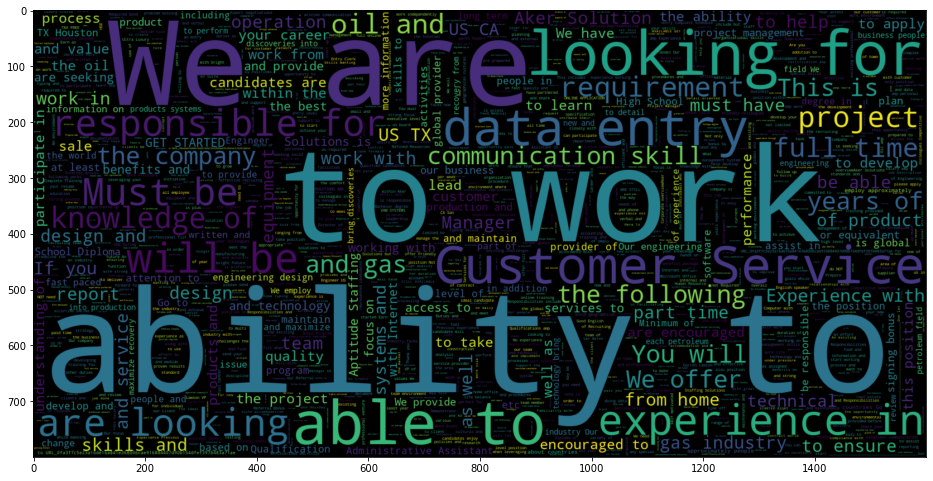

In [48]:

plt.figure(figsize = (16,14))
wc = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 800).generate(str(" ".join(fraudjobs_text)))
plt.imshow(wc,interpolation = 'bilinear')



In [31]:
# Create our list of punctuation marks
punctuations = string.punctuation

# Create our list of stopwords

stop_words = spacy.lang.en.stop_words.STOP_WORDS

# Load English tokenizer, tagger, parser, NER and word vectors
parser = English()

# Creating our tokenizer function
def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    mytokens = parser(sentence)

    # Lemmatizing each token and converting each token into lowercase
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    # Removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # return preprocessed list of tokens
    return mytokens

In [32]:

# Custom transformer using spaCy
class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        # Cleaning Text
        return [clean_text(text) for text in X]

    def fit(self, X, y=None, **fit_params):
        return self

    def get_params(self, deep=True):
        return {}

# Basic function to clean the text
def clean_text(text):
    # Removing spaces and converting text into lowercase
    return text.strip().lower()



In [33]:
# creating our bag of words
bow_vector = CountVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,3))

In [38]:

train, test = train_test_split(to_df, train_size=0.80, test_size=0.20, 
                                stratify= df['fraudulent'], random_state=3)

train, val = train_test_split(train, train_size=0.80, test_size=0.20, 
                                stratify= train['fraudulent'], random_state=3)


In [44]:
features = 'text'
target = 'fraudulent'

In [45]:
X_train = train[features]
X_val = val[features]
X_test = test[features]
y_train = train[target]
y_val = val[target]
y_test = test[target]

In [46]:
clf = LogisticRegression()

# Create pipeline using Bag of Words
pipe = Pipeline([("cleaner", predictors()),
                 ('vectorizer', bow_vector),
                 ('classifier', clf)])

# fitting our model.
pipe.fit(X_train,y_train)

Pipeline(steps=[('cleaner', <__main__.predictors object at 0x0000028E21A388C8>),
                ('vectorizer',
                 CountVectorizer(ngram_range=(1, 3),
                                 tokenizer=<function spacy_tokenizer at 0x0000028E220B9F78>)),
                ('classifier', LogisticRegression())])

In [47]:
# Predicting with a test dataset
linpredicted = pipe.predict(X_val)

print("Logistic Regression Accuracy:", accuracy_score(y_val, linpredicted))
print("Logistic Regression Recall:", recall_score(y_val, linpredicted))

Logistic Regression Accuracy: 0.9867179307934288
Logistic Regression Recall: 0.7266187050359713


In [50]:
clf = XGBClassifier()

# Create pipeline using Bag of Words
pipe = Pipeline([("cleaner", predictors()),
                 ('vectorizer', bow_vector),
                 ('classifier', clf)])

# fitting our model.
pipe.fit(X_train,y_train)

Pipeline(steps=[('cleaner', <__main__.predictors object at 0x0000028E15F19FC8>),
                ('vectorizer',
                 CountVectorizer(ngram_range=(1, 3),
                                 tokenizer=<function spacy_tokenizer at 0x0000028E220B9F78>)),
                ('classifier', XGBClassifier())])

In [51]:
# Predicting with a test dataset
xgpredicted = pipe.predict(X_val)

print("XGboost Regression Accuracy:", accuracy_score(y_val, xgpredicted))
print("XGboost Regression Recall:", recall_score(y_val, xgpredicted))

XGboost Regression Accuracy: 0.9741349178608878
XGboost Regression Recall: 0.4748201438848921


In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

In [52]:
#this does not work but demonstrates I know how
'''

model = RandomForestClassifier(n_estimators=20, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)



feature_names = X_val.columns.tolist()

permuter = PermutationImportance(
    model,
    scoring='accuracy',
    n_iter=5,
    random_state=42
)

permuter.fit(X_val, y_val)

eli5.show_weights(
    permuter,
    top=None,
    feature_names=feature_names
)

'''

ValueError: could not convert string to float: 'Vice President of Talent and Employee Experience  US, TX, Austin Why CSD?CSD is not only a great place to work, but also to learn, grow and give back to the community. Our organization is made up of talented, motivated people from diverse cultural, educational and professional backgrounds. We believe in teamwork, shared ideas, and creating solutions together while respecting individuality and innovation. We seek out people who want to see their ideas put into action, are committed to making a difference and who believe that more is possible!\xa0Who We AreHere, you will discover colleagues who have passion for our company, our community, customers and each other, and that are led by a team of outstanding people who believe that more is possible from each and every one of us.\xa0 The Vice President of Talent and Employee Experience is the executive chiefly responsible for recruiting the best talent and delivering an exceptional employee experience for all of CSD’s 1,000+ team members worldwide. The VP oversees all employee programs including recruitment, professional development, training, compensation, and benefits. Additionally, the VP is responsible for administering company policies and ensuring compliance with all federal and state employment requirements. The VP supports a team of professionals who collectively endeavor to make CSD an amazing place to work, collaborate, and grow.\xa0Duties include but are not limited to:\xa0Partners with the President of CSD to develop, implement, evaluate, and improve an organizational plan for leveraging talent to support company business objectives.Supports the creation and cultivation of a global talent pipeline.Oversee programming specific to an AMAZING employment experience at CSD, including compensation, benefits, perks, professional development, and internal training resources.Collaborate with other members of the executive leadership team to refine and optimize employee-centric process, leveraging technology wherever possible.Develop and execute a succession planning strategy for the organization.Administer the collection and warehousing of employee data and compliance with data privacy requirements.Develop and administer company employment policies and procedures.Ensure company adherence to all federal, state, and local employment laws and required reports.Serve as a subject matter expert to the executive leadership team on employment related topics.Provide essential change management leadership and ensure that the company considers, protects and promotes the well being of our employee workforce.Be the LEAD ambassador for employment at CSD and build a powerful network within the deaf and mainstream communities.Serve as a member of the executive leadership team at CSD. Some demonstrable experience working within the deaf communityStrong written and interpersonal communication skillsDemonstrable organizational abilitiesAbility to communicate effectively in American Sign Language.Ability to travel up to 25% of the time (one week per month)High degree of technical literacy (use of applications, devices, and other technology to deliver services.)Ability to be home-based in Austin, TexasUndergraduate degree in a business related field of studyGraduate degree with people-centric specialization highly preferredAt least ten years of progressively responsible experiences in roles supporting the employee experienceA minimum of five years managing and leading teams in a professional setting Communication Service for the Deaf, Inc. is an Equal Opportunity Affirmative Action Employer and drug free and tobacco free workplace. All qualified applicants will receive consideration for employment without regard to race, color, religion, sex or national origin, including individuals with a disability and protected veterans. '